## ---> _Data Preparation_

### Importing required libraries

In [47]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from numpy import mean,std

### Generate data

In [48]:
X, y = make_classification(n_samples=1000, n_features= 20, n_informative=15,n_redundant=5, random_state=123)

### Do a train test split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Initialize standardizing object

In [50]:
scaler = MinMaxScaler()

### Initialize model object

In [51]:
logModel = LogisticRegression()

### Create steps object

In [52]:
steps = []
steps.append(("minmaxscaler",scaler))
steps.append(("model",logModel))

### Initialize pipeline

In [53]:
pipe = Pipeline(steps)

### Initialize Kfold

In [54]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)

### Fit the model

In [55]:
scores = cross_val_score(pipe, X_train, y_train, cv=rskf, n_jobs=-1)

### Print out the mean and std of scores

In [56]:
print("Mean of accuracy is : %s"%(mean(scores)))
print("Standard deviation of accuracy is : %s"%(std(scores)))

Mean of accuracy is : 0.8029166666666667
Standard deviation of accuracy is : 0.03286388172785166


## ---> _Data Cleaning_

### Load required libraries

In [57]:
import pandas as pd

#### Import dataset

In [58]:
df = pd.read_csv("./Datasets/oil-spill-dataset/oil-spill.csv", header = None).reset_index(drop=True)

#### Find out the unique values in each column

In [59]:
counts = df.nunique()

#### Filter out the column indexes which have only one unique value

In [60]:
to_del = [i for i,v in enumerate(counts) if v==1]
print(to_del)

[22]


#### Drop that column which has only one unique value

In [61]:
print(df.shape)
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
(937, 49)


#### Filter out the columns which have less unique values

In [62]:
valPercentages = (df.nunique()/len(df))*100
print(valPercentages[:10])

0    25.400213
1    31.696905
2    98.932764
3    99.573106
4    19.103522
5    40.021345
6    87.513340
7    65.955176
8    59.871932
9     6.083244
dtype: float64


#### Find indexes of the columns that have the percentage less than 1

In [63]:
to_del = [i for i,v in enumerate(valPercentages) if v<=1]
print(to_del)

[21, 23, 24, 25, 31, 35, 37, 38, 44, 48]


#### Drop the columns that have the percentage less than 1

In [64]:
print(df.shape)
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 49)
(937, 39)


#### Remove the columns that have a low variance 

In [67]:
from sklearn.feature_selection import VarianceThreshold
from numpy import arange
import seaborn as sns

##### First split the data into X and y

In [68]:
X = df.values[:,:-1]
y = df.values[:,-1]

##### Initialize thresholds and plot the features which fall under those thresholds

In [72]:
thresholds = arange(0,0.55,0.05)
results = []
for t in thresholds:
    vt = VarianceThreshold(threshold=t)
    X_sel = vt.fit_transform(X)
    n_features = X_sel.shape[1]
    print("threshold = %s and Number of features = %s"%(t,n_features))
    results.append(n_features)

threshold = 0.0 and Number of features = 38
threshold = 0.05 and Number of features = 27
threshold = 0.1 and Number of features = 27
threshold = 0.15000000000000002 and Number of features = 26
threshold = 0.2 and Number of features = 26
threshold = 0.25 and Number of features = 26
threshold = 0.30000000000000004 and Number of features = 26
threshold = 0.35000000000000003 and Number of features = 26
threshold = 0.4 and Number of features = 26
threshold = 0.45 and Number of features = 25
threshold = 0.5 and Number of features = 24


#### Plot the threshold on X-axis and Number of features on Y-axis

Text(0, 0.5, 'Number of Features')

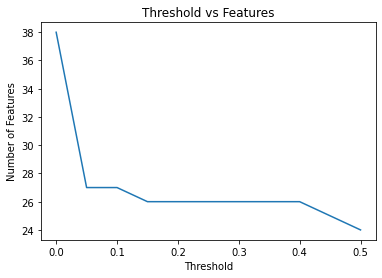

In [81]:
fig = sns.lineplot(x=thresholds,y=results)
fig.set_title("Threshold vs Features")
fig.set_xlabel("Threshold")
fig.set_ylabel("Number of Features")

In [82]:
vt = VarianceThreshold(threshold = 0.4) # as we see that more number of columns were being dropped from 0 to 0.4 threshold

#### Find rows that have duplicated data

In [92]:
dups = df.duplicated()
print(dups.any())
print(df[dups])

False
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 26, 27, 28, 29, 30, 32, 33, 34, 36, 39, 40, 41, 42, 43, 45, 46, 47, 49]
Index: []

[0 rows x 39 columns]


#### Delete rows that contain duplicated data

In [93]:
df.drop_duplicates(keep="first",inplace=True)
df.reset_index(drop=True,inplace = True)